### Importing the dependencies to work with

In [43]:
import lmfit
import rampy as rp #Charles' libraries and functions

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px

###  Reading the data file

In [44]:
# Load Data
filename = 'Data/qg27_thyl_XY04'
data = pd.read_csv(filename, delimiter = "\t", names=["x", "y"])

### Visualize the Data

In [45]:
fig = px.line(data_frame=data, x=data['x'], y=data['y'])
fig.show()

In [46]:
# Convert Dataframe data to numpy arrays for working with smoothening and correction
data_array = data.to_numpy()
x = data_array[:,0]
y = data_array[:,1]


For smoothening

In [47]:
# Incase to smooth
# y_smo = rp.smooth(data_array[:,0],data_array[:,1],method="savgol",window_length=5,polyorder=3)
# y_smo = rp.smooth(x,y,method="whittaker",Lambda=10**0.5)

Check the smoothen and raw data

In [48]:
# Check the plots before and after smooth
# plt.figure(figsize=(8,8))
# plt.subplot(2,1,1)
# plt.plot(x, y)
# plt.title("Raw Data")
# plt.subplot(2,1,2)
# plt.title("Smoothen Data")
# plt.plot(data_array[:,0], y_smo)

#### Select the region of Interest (ROI)

In [49]:
roi = np.array([(1347,1365),(1774,1800)])
roi[1,1]

1800

### Baseline Fitting and trimming the data

In [50]:
# Base line correction
y_corr, y_base = rp.baseline(x,y,roi,'poly',polynomial_order=3)

# Trim the data
x_fit = x[np.where((x > roi[0,0])&(x < roi[1,1]))]
y_fit = y_corr[np.where((x > roi[0,0])&(x < roi[1,1]))]

Plot the trimmed data

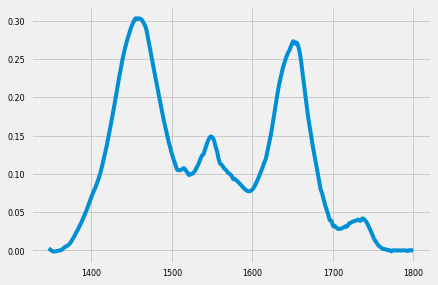

In [51]:
plt.figure()
plt.plot(x_fit,y_fit)
# plt.xlim([1347,1849])
# plt.title("Trimmed Data non-normalized")

Normalized the trimmed data and plot

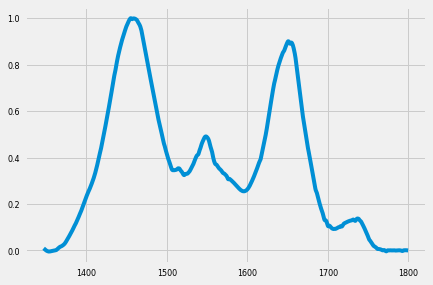

In [52]:
y_fit_norm_intensity = rp.normalise(y_fit,x=x_fit,method="intensity")
plt.plot(x_fit,y_fit_norm_intensity)
# plt.title("Trimmed Data normalized to max intensity")


If you want to use the normalized data for rest of your work use that variable accordingly, for example, y_fit_norm_intensity is for nomalized data and y_fit is for non normalized data

More on residuals from this fit

In [53]:
# ese0 = np.sqrt(abs(y_fit[:,0]))/abs(y_fit[:,0]) # the relative errors after baseline subtraction
# print(ese0)
# y_fit[:,0] = y_fit[:,0]/np.amax(y_fit[:,0])*10 # normalise spectra to maximum intensity, easier to handle 

# sigma = abs(ese0*y_fit[:,0]) #calculate good ese
# sigma

Text(0.5, 1.0, 'B) signal to fit')

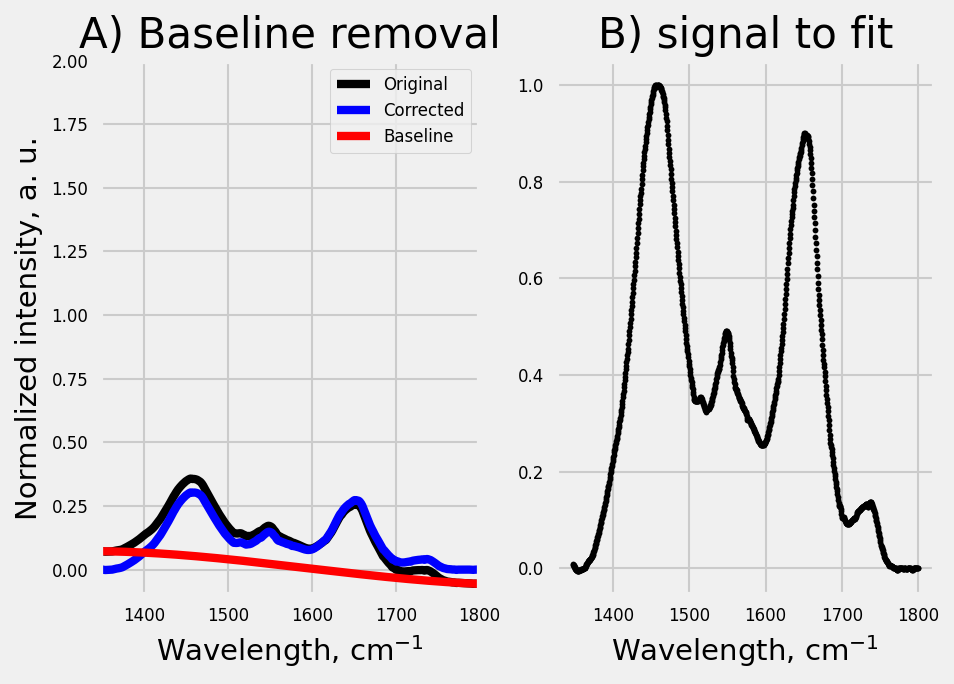

In [54]:
# create a new plot for showing the spectrum
plt.figure(dpi=150)
plt.subplot(1,2,1)
inp = plt.plot(x,y,'k-',label='Original')
corr = plt.plot(x,y_corr,'b-',label='Corrected') #we use the sample variable because it is not already normalized...
bas = plt.plot(x,y_base,'r-',label='Baseline')
plt.xlim(roi[0,0],roi[1,1])
plt.ylim(-0.1,2)
plt.xlabel("Wavelength, cm$^{-1}$", fontsize = 14)
plt.ylabel("Normalized intensity, a. u.", fontsize = 14)
plt.legend()
plt.title('A) Baseline removal')

plt.subplot(1,2,2)
plt.plot(x_fit,y_fit_norm_intensity,'k.')
plt.xlabel("Wavelength, cm$^{-1}$", fontsize = 14)
plt.title('B) signal to fit')
#plt.tight_layout()
# plt.suptitle('Figure 2', fontsize = 14,fontweight = 'bold')

### Replot for quick check for the input paramaters 

In [55]:
arr = np.column_stack((x_fit,y_fit_norm_intensity))
my_array = pd.DataFrame(arr, columns = ['x_fit','y_fit'])
fig = px.line(data_frame=my_array, x=my_array['x_fit'], y=my_array['y_fit'])
fig['layout']['xaxis']['autorange'] = "reversed"
fig.show()

It would be good to check the plot and assign initial parameters in the parameters section for good and faster fit.

### Parameters Section

Make sure to add equal number of parameters as you have used in case of the residual local function . 

In [56]:
params = lmfit.Parameters()
algo = 'leastsq'
#               (Name,  Value,   Vary,   Min,     Max,       Expr)
params.add_many(
                # Protein
                ('a1',   0.1,    True,    0,      0.2,     None), #Amplitude
                ('f1',   1740,   True,   1735,    1755,    None), #position
                ('l1',   5,      True,    1,      50,     None), # FWHM

                ('a2',   0.04,    True,     0,      0.2,    None),   #Amplitude
                ('f2',   1725,   True,   1720,     1745,     None),
                ('l2',    5,    True,    1,       50,    None), 
                # Lipid
                ('a3',   0.9,    True,    0,       1,        None),  # Amplitude
                ('f3',   1654,   True,    1640,   1660,     None),
                ('l3',   20,     True,     10,     40,      None),

                ('a4',   0.9,    True,      0,      1,      None), # Amplitude
                ('f4',   1636,   True,   1630,    1650,     None),
                ('l4',   20,     True,     10,     80,      None), 
                
                ####
                ('a5',   0.3,    True,    0.0,     1,       None), # Amplitude
                ('f5',   1547,   True,    1592,    1505,    None),
                ('l5',   40,     True,     0,      100,     None),

                ('a6',   0.7,    True,     0.0,       1,    None), # Amplitude
                ('f6',   1453,   True,    1425,    1470,    None),
                ('l6',   20,     True,     0,      50,      None),   
                
                ('a7',   0.07,    True,     0.0,    1,      None), # Amplitude
                ('f7',   1378,   True,    1350,    1380,    None),
                ('l7',   10,     True,     0,      10,      None),   
                        
               )
params  

name,value,initial value,min,max,vary
a1,0.10000000,0.1,0.00000000,0.20000000,True
f1,1740.00000,1740,1735.00000,1755.00000,True
l1,5.00000000,5,1.00000000,50.0000000,True
a2,0.04000000,0.04,0.00000000,0.20000000,True
f2,1725.00000,1725,1720.00000,1745.00000,True
l2,5.00000000,5,1.00000000,50.0000000,True
a3,0.90000000,0.9,0.00000000,1.00000000,True
f3,1654.00000,1654,1640.00000,1660.00000,True
l3,20.0000000,20,10.0000000,40.0000000,True
a4,0.90000000,0.9,0.00000000,1.00000000,True


### Run Fit

In [57]:
from Modules.custom_funx import residual
result = lmfit.minimize(residual, params, method = algo, args=(x_fit, y_fit_norm_intensity[:,0]))
print(lmfit.fit_report(result))

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 158
    # data points      = 940
    # variables        = 21
    chi-square         = 0.27382588
    reduced chi-square = 2.9796e-04
    Akaike info crit   = -7610.67418
    Bayesian info crit = -7508.91070
##  Warning: uncertainties could not be estimated:
[[Variables]]
    a1:  0.10190170 +/- 0.05793293 (56.85%) (init = 0.1)
    f1:  1739.02621 +/- 2.05728097 (0.12%) (init = 1740)
    l1:  10.3165880 +/- 1.72245495 (16.70%) (init = 5)
    a2:  0.06438043 +/- 0.02644952 (41.08%) (init = 0.04)
    f2:  1720.54423 +/- 10.0978141 (0.59%) (init = 1725)
    l2:  15.5895447 +/- 8.41329919 (53.97%) (init = 5)
    a3:  0.65666727 +/- 0.05603258 (8.53%) (init = 0.9)
    f3:  1651.24961 +/- 0.30869889 (0.02%) (init = 1654)
    l3:  22.4010964 +/- 0.87462979 (3.90%) (init = 20)
    a4:  0.28043615 +/- 0.04744877 (16.92%) (init = 0.9)
    f4:  1630.59151 +/- 6.26015786 (0.38%) (init = 1636)
    l4:  48.2746047 +/- 3.6806

### Get all the residuals

In [58]:
yout, peak1,peak2,peak3,peak4,peak5,peak6, peak7 = residual(result.params,x_fit)
res_stack = np.column_stack((yout,peak1,peak2,peak3,peak4,peak5,peak6,peak7))



['Data']


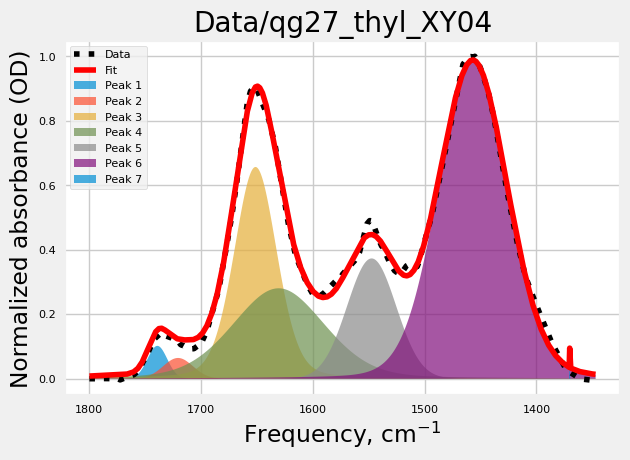

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [64]:
# Create dataframe
res_df = pd.DataFrame(res_stack)
col_names = ['Fit']
nCol = res_df.shape
for k in range(0,nCol[1]):
    if k > 0:
        col_names.append('Peak '+ str(k))
res_df.columns = col_names
data_df = pd.DataFrame(y_fit_norm_intensity, columns = ['Data'])        
res_df = pd.concat([data_df, res_df], axis=1)

# Create Plot
sh = res_df.shape
cols = res_df.columns
plt.figure(dpi=100)
plt.style.use('fast')
for x in range(0,sh[1]):
    if cols[x]== 'Data':
        print([cols[x]])
        plt.plot(x_fit,res_df[cols[x]],'k:', markerfacecolor="None",label = cols[x])
    elif cols[x]== 'Fit':
        plt.plot(x_fit,res_df[cols[x]],'r', markerfacecolor="None",label = cols[x])
    else:   
        plt.fill_between(x_fit,res_df[cols[x]],alpha=0.7,label =cols[x])

plt.legend(loc="upper left")
plt.gca().invert_xaxis()
ax = plt.gca()
ax.set_facecolor('w')
plt.title(filename)
plt.xlabel("Frequency, cm$^{-1}$")
plt.ylabel("Normalized absorbance (OD)")
plt.show()
print(plt.style.available)

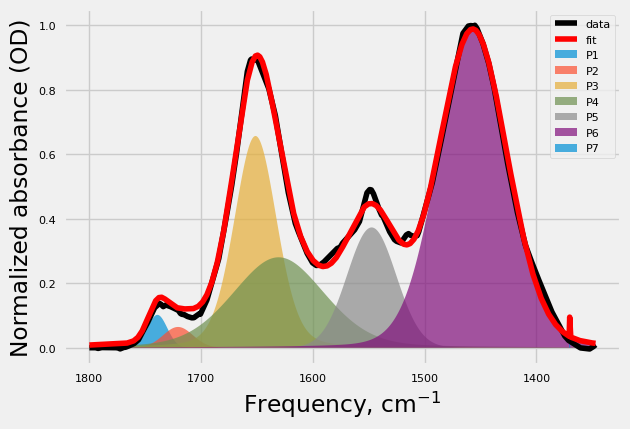

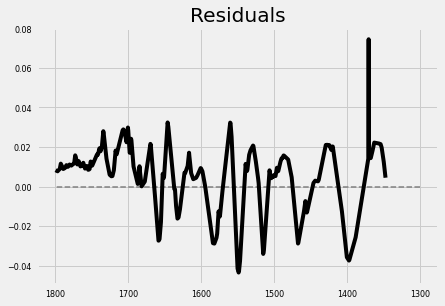

Data/qg27_thyl_XY04
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 158
    # data points      = 940
    # variables        = 21
    chi-square         = 0.27382588
    reduced chi-square = 2.9796e-04
    Akaike info crit   = -7610.67418
    Bayesian info crit = -7508.91070
##  Warning: uncertainties could not be estimated:
[[Variables]]
    a1:  0.10190170 +/- 0.05793293 (56.85%) (init = 0.1)
    f1:  1739.02621 +/- 2.05728097 (0.12%) (init = 1740)
    l1:  10.3165880 +/- 1.72245495 (16.70%) (init = 5)
    a2:  0.06438043 +/- 0.02644952 (41.08%) (init = 0.04)
    f2:  1720.54423 +/- 10.0978141 (0.59%) (init = 1725)
    l2:  15.5895447 +/- 8.41329919 (53.97%) (init = 5)
    a3:  0.65666727 +/- 0.05603258 (8.53%) (init = 0.9)
    f3:  1651.24961 +/- 0.30869889 (0.02%) (init = 1654)
    l3:  22.4010964 +/- 0.87462979 (3.90%) (init = 20)
    a4:  0.28043615 +/- 0.04744877 (16.92%) (init = 0.9)
    f4:  1630.59151 +/- 6.26015786 (0.38%) (init = 1636)
    l4:  4

In [61]:
from matplotlib.pyplot import title


plt.figure(dpi=100)

plt.plot(x_fit,y_fit_norm_intensity,'k', markerfacecolor="None",label = 'data' )
plt.plot(x_fit,yout, 'r',label = 'fit' )
plt.fill_between(x_fit,peak1, alpha=0.7,label = 'P1')
plt.fill_between(x_fit,peak2, alpha=0.7, label = 'P2')
plt.fill_between(x_fit,peak3, alpha=0.7, label = 'P3')
plt.fill_between(x_fit,peak4, alpha=0.7, label = 'P4')
plt.fill_between(x_fit,peak5, alpha=0.7, label = 'P5')
plt.fill_between(x_fit,peak6, alpha=0.7, label = 'P6')
plt.fill_between(x_fit,peak7, alpha=0.7, label = 'P7')
# ax = plt.gca()
# ax.title("A")
plt.legend(loc="upper right")
plt.xlabel("Frequency, cm$^{-1}$")
plt.ylabel("Normalized absorbance (OD)")
# plt.plot.title("Trimmed")
plt.gca().invert_xaxis()
plt.show()


plt.plot(x_fit,result.residual,'k')
plt.gca().invert_xaxis()
plt.title("Residuals")
plt.hlines(y= 0,xmin= 1300, xmax= 1800, color='grey', linestyle ='dashed', linewidth = 1.5)
plt.show()

print(filename)
print(lmfit.fit_report(result))


In [62]:
# Area under curve calculation
from scipy.integrate import trapezoid

a_p1 = trapezoid(peak1,x_fit)
a_p2 = trapezoid(peak2,x_fit)
print(a_p1)
print(a_p2)
sum_lipid = a_p1+a_p2
print(sum_lipid)

a_p3 = trapezoid(peak3,x_fit)
a_p4 = trapezoid(peak4,x_fit)

sum_protein = a_p3+a_p4
print(sum_protein)

r = sum_protein/sum_lipid
r

-2.2381012766509483
-2.136729304321774
-4.374830580972722
-63.99329168496537


14.627604543885395

In [63]:
res = y_fit_norm_intensity - yout
np.savetxt("y_fit_norm_intensity.csv",y_fit_norm_intensity, delimiter=",")
np.savetxt("yout.csv",yout, delimiter=",")
np.savetxt("res.csv",res, delimiter=",")
np.savetxt("x_fit.csv",x_fit, delimiter=",")